In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


file_path = 'edited/ComparePromotionalWordWithNone.xlsx'
df= pd.read_excel(file_path, sheet_name='main')
df.head()

,Post_ID_post,category_id_post,sub_category_post,title,namefreelance,web-scraper-order,web-scraper-start-url,link,rating_comment_post,Num_comment_post,...,link-href_y,link-href,NumFamousWord,PromotionalWordCount,lengthTitle,venue,CanSold,usePromoWord,encode_canSoldTrue,encode_canSoldFalse
0,4463,Website_and_technology,web-development,พัฒนาเว็บไซต์และ สร้างเว็บไซต์เพื่อธุรกิจ และร...,franstudio,1718240853-12,https://fastwork.co/web-development?source=cat...,พัฒนาเว็บไซต์และ สร้างเว็บไซต์เพื่อธุรกิจ และร...,0.0,0,...,NaN,NaN,16,0,98,0,False,False,0,1
1,4523,Website_and_technology,web-development,พัฒนาเว็บไซต์และ สร้างเว็บไซต์เพื่อธุรกิจ และร...,NaN,1718242988-212,https://fastwork.co/web-development?source=cat...,NaN,0.0,0,...,NaN,NaN,16,0,98,0,False,False,0,1
2,2908,Marketing_and_advertising,google-ads,เพิ่มยอดขาย สร้างโฆษณา ให้มีคุณภาพ บริการยิง A...,chadamas,1718258859-700,https://fastwork.co/google-ads?source=category...,เพิ่มยอดขาย สร้างโฆษณา ให้มีคุณภาพ บริการยิง A...,4.7,105,...,NaN,NaN,16,0,97,195000,True,False,1,0
3,202,Business_and_consulting,consultant-other,รับเขียนคู่มือการทำงานทุกรูปแบบ เริ่มจากศูนย์...,haruethai,1718520030-13,https://fastwork.co/consultant-other?source=ca...,รับเขียนคู่มือการทำงานทุกรูปแบบ เริ่มจากศูนย์...,5.0,1,...,NaN,https://fastwork.co/user/haruethai/consultant-...,16,0,97,2500,True,False,1,0
4,3578,Image_and_sound,sound-engineering,แก้ไข และปรับปรุงคุณภาพเสียง งานเสียงทุกประเภท...,tudtu2804,1718280972-410,https://fastwork.co/sound-engineering?source=c...,แก้ไข และปรับปรุงคุณภาพเสียง งานเสียงทุกประเภท...,5.0,1,...,NaN,https://fastwork.co/user/tudtu2804/sound-engin...,15,1,98,600,True,True,1,0


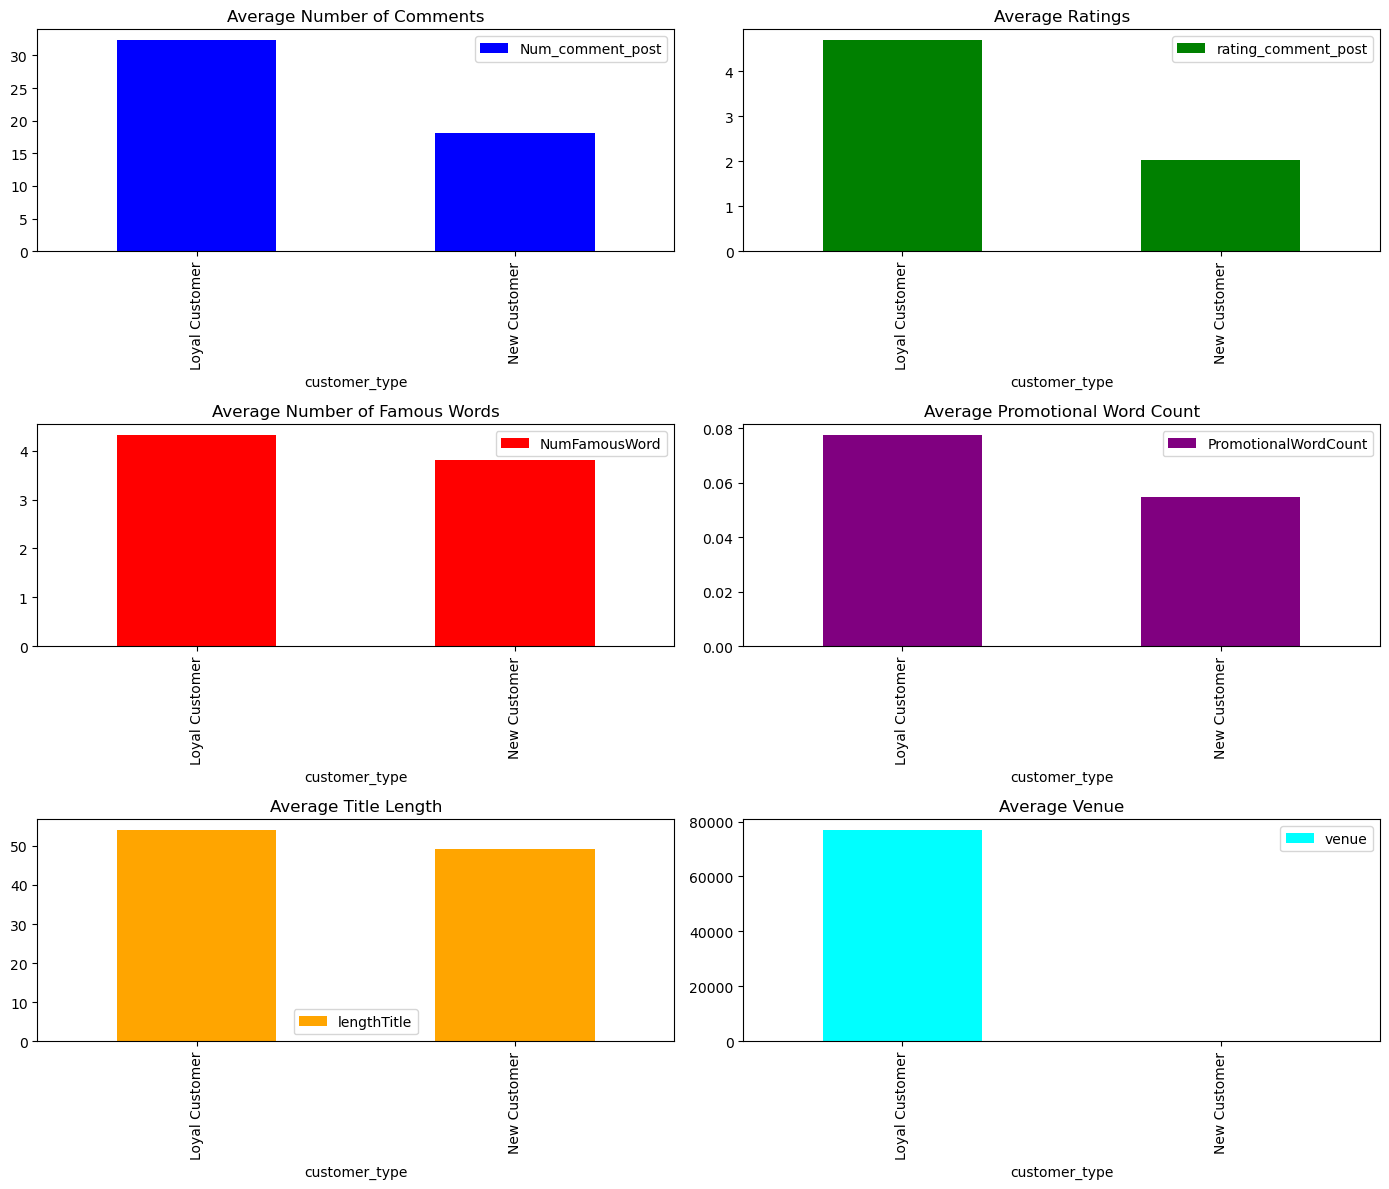

In [6]:
# Function to categorize new vs. loyal customers based on repeat hires (assuming CanSold indicates repeat hire)
def categorize_customer(row):
    if row['CanSold']:
        return 'Loyal Customer'
    else:
        return 'New Customer'

df['customer_type'] = df.apply(categorize_customer, axis=1)

# Calculate average metrics
avg_metrics = df.groupby('customer_type').agg({
    'Num_comment_post': 'mean',
    'rating_comment_post': 'mean',
    'NumFamousWord': 'mean',
    'PromotionalWordCount': 'mean',
    'lengthTitle': 'mean',
    'venue': 'mean',
    'encode_canSoldTrue': 'mean'
}).reset_index()

# Plotting the results
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

avg_metrics.plot(kind='bar', x='customer_type', y='Num_comment_post', ax=axes[0, 0], color='blue', title='Average Number of Comments')
avg_metrics.plot(kind='bar', x='customer_type', y='rating_comment_post', ax=axes[0, 1], color='green', title='Average Ratings')
avg_metrics.plot(kind='bar', x='customer_type', y='NumFamousWord', ax=axes[1, 0], color='red', title='Average Number of Famous Words')
avg_metrics.plot(kind='bar', x='customer_type', y='PromotionalWordCount', ax=axes[1, 1], color='purple', title='Average Promotional Word Count')
avg_metrics.plot(kind='bar', x='customer_type', y='lengthTitle', ax=axes[2, 0], color='orange', title='Average Title Length')
avg_metrics.plot(kind='bar', x='customer_type', y='venue', ax=axes[2, 1], color='cyan', title='Average Venue')

plt.tight_layout()
plt.show()